In [28]:
# Import libraries.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings

In [29]:
# Load a dataset called “Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.,”.
data = sm.datasets.co2.load_pandas()
co2 = data.data
print(co2.shape)

(2284, 1)


In [30]:
co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [31]:
# Print index.
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [32]:
# The 'MS' string groups the data in buckets by start of the month.
y = co2['co2'].resample('MS').mean()

In [33]:
# Check the missing values.
y.isnull().sum()

5

In [34]:
# The term bfill means that we use the value before filling in missing values.
y = y.fillna(y.bfill())

print(y)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64


In [35]:
# Check the missing values.
y.isnull().sum()

0

In [36]:
# Retrieve data after the year 1990.
y['1990':]

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
               ...   
2001-08-01    369.425
2001-09-01    367.880
2001-10-01    368.050
2001-11-01    369.375
2001-12-01    371.020
Freq: MS, Name: co2, Length: 144, dtype: float64

In [37]:
# Retrieve data between January and Decembr 1997.
y['1997-01-01':'1997-12-31']

1997-01-01    363.125
1997-02-01    363.875
1997-03-01    364.560
1997-04-01    366.325
1997-05-01    366.680
1997-06-01    365.475
1997-07-01    364.375
1997-08-01    362.460
1997-09-01    360.150
1997-10-01    360.750
1997-11-01    362.380
1997-12-01    364.250
Freq: MS, Name: co2, dtype: float64

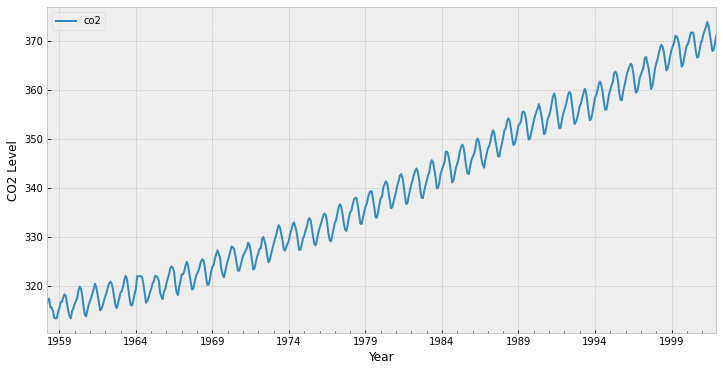

In [38]:
plt.style.use('bmh')
y.plot(figsize=(12, 6))
plt.style.context('Solarize_Light2')
plt.xlabel("Year")
plt.ylabel("CO2 Level")
plt.legend(loc='upper left')
plt.show()

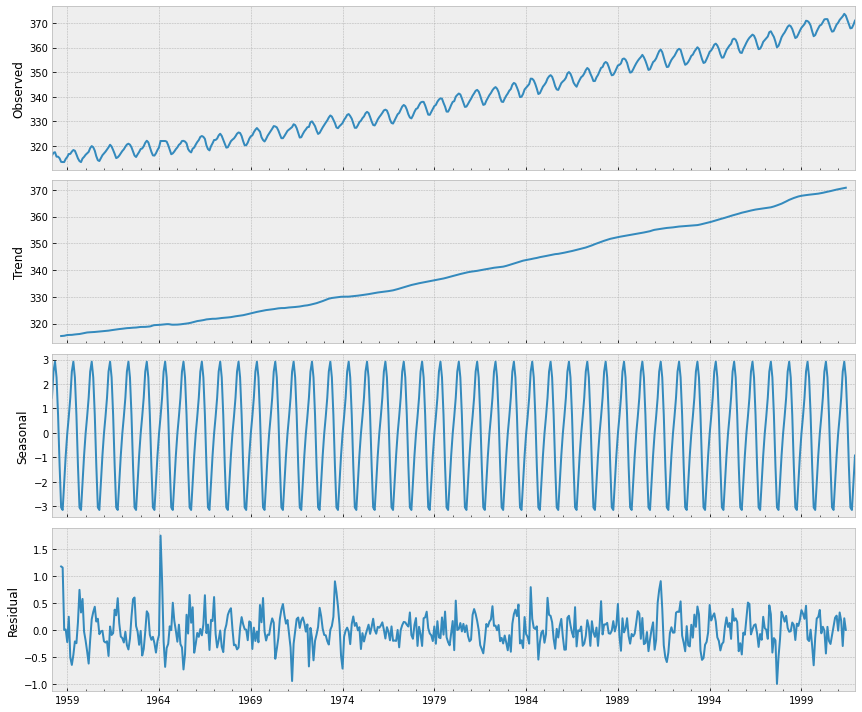

In [39]:
# Plot raw, trend (upwards), seasonal (yearly), and residual data points.

from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [40]:
# Load a dataset called “Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.,”.
data = sm.datasets.sunspots.load_pandas().data
print(data.shape)

(309, 2)


In [41]:
data.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [42]:
data.tail()

,YEAR,SUNACTIVITY
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


In [43]:
# Check the missing values.
data.isnull().sum()

YEAR           0
SUNACTIVITY    0
dtype: int64

In [44]:
data.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del data["YEAR"]

In [45]:
data.head()

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0


In [46]:
data.tail()

,SUNACTIVITY
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5
2008-12-31,2.9


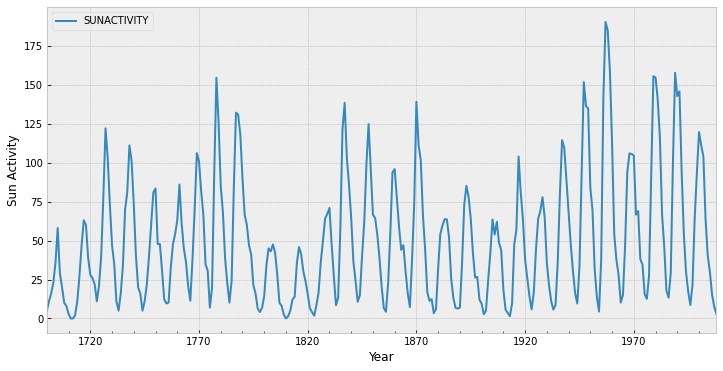

In [47]:
plt.style.use('bmh')
data.plot(figsize=(12, 6))
plt.style.context('Solarize_Light2')
plt.xlabel("Year")
plt.ylabel("Sun Activity")
plt.legend(loc='upper left')
plt.show()

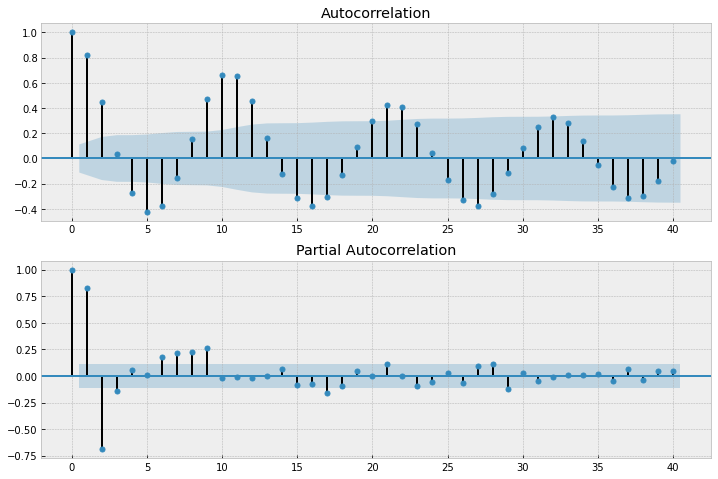

In [48]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=40, ax=ax2)

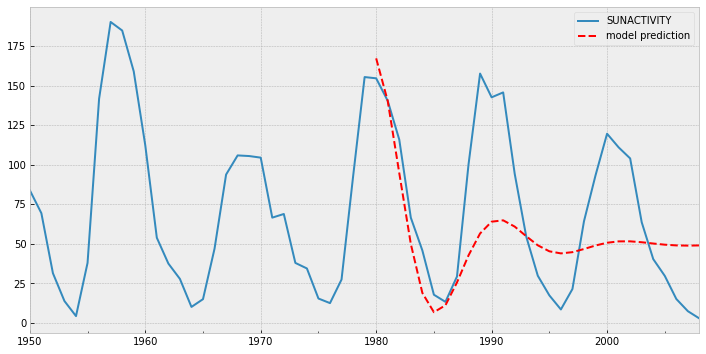

In [75]:
# Specify to ignore warning messages.
warnings.filterwarnings("ignore")

# Fit the model.  Autoregressive Moving Average (ARMA).
arma_mod20 = sm.tsa.ARMA(data, (2,0)).fit()
predict_sunspots = arma_mod20.predict('1980', '2020', dynamic=True)

# Show predicted values from the model for a subset of the data.
ax = data.loc['1950':].plot(figsize=(12,6), label='raw data')
ax = predict_sunspots.plot(ax=ax, style='r--', label='model prediction');
plt.xlim([-20.0, 38.0])
ax.legend();
plt.show()